In [1]:
import sys
sys.path.append('..')
import selex_dca, utils

import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

import utils
import selex_dca
import selex_distribution, energy_models, tree, data_loading, training, callback, sampling, plotting

from matplotlib import cm
import pickle
import logomaker

/home/scrotti/Aptamer2025py/experiments/../selex_dca.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
experiment_ids = ['Dop8V030', 'Dop8V930', 'Dop8V2430']
round_ids = ["ARN", "R01", "R02N"]
n_rounds = len(round_ids)
L, q = 45, 4

In [3]:
models_indep = [torch.load(f'./saved/{experiment_id}_indep_sites.pt', weights_only=False, map_location='cpu')
          for experiment_id in experiment_ids]

In [5]:
models_potts = [torch.load(f'./saved/{experiment_id}.pt', weights_only=False, map_location='cpu')
          for experiment_id in experiment_ids]

In [6]:
model = models_potts[2]

In [34]:
n_chains = 10**3
n_sweeps = 50
fi = []

for model in models_potts:
    chains = training.init_chains(1, n_chains, L, q)[0]
    compute_energy = lambda x: model.selection.modes[0].compute_energy(x)
    chains, _ = sampling._sample_metropolis(chains, compute_energy, n_steps=L*n_sweeps)
    fi.append(utils.get_freq_single_point(chains))

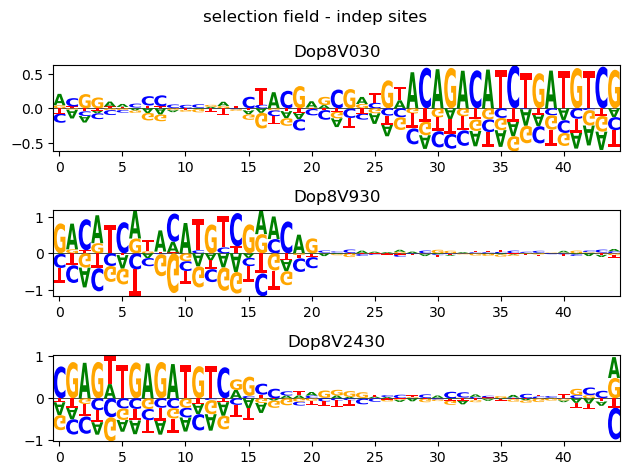

In [31]:
fig, axes = plt.subplots(len(experiment_ids))
for (i, model) in enumerate(models_indep):
    ax = axes[i]
    h_indep = model.selection.modes[0].set_zerosum_gauge().h.clone().detach()
    logomaker.Logo(pd.DataFrame(h_indep, columns=list(utils.TOKENS_DNA)), ax=ax)
    ax.set_title(experiment_ids[i])
fig.suptitle('selection field - indep sites')
fig.tight_layout()

In [38]:
torch.exp(torch.tensor([0.5])) / torch.exp(torch.tensor([-0.5]))

tensor([2.7183])

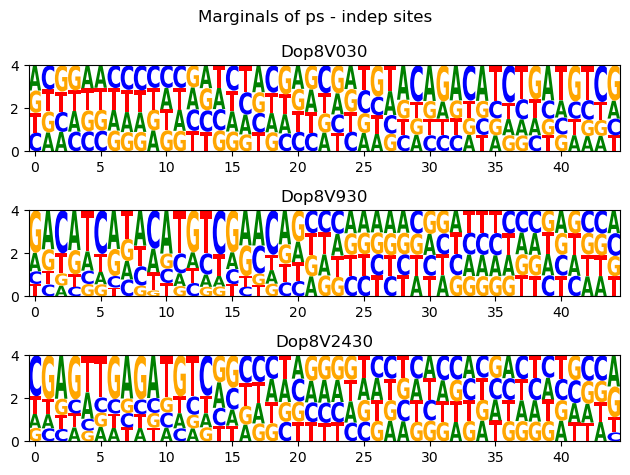

In [32]:
fig, axes = plt.subplots(len(experiment_ids))
for (i, model) in enumerate(models_indep):
    ax = axes[i]
    h_indep = model.selection.modes[0].set_zerosum_gauge().h.clone().detach()
    marg = torch.exp(h_indep)
    marg = marg / marg.mean(1, keepdim=True)
    logomaker.Logo(pd.DataFrame(marg, columns=list(utils.TOKENS_DNA)), ax=ax)
    ax.set_title(experiment_ids[i])
fig.suptitle('Marginals of ps - indep sites')
fig.tight_layout()

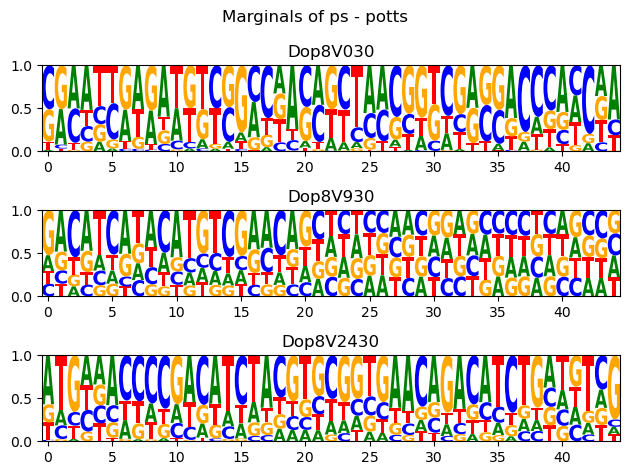

In [35]:
fig, axes = plt.subplots(len(experiment_ids))
for (i, marg) in enumerate(models_potts):
    ax = axes[i]
    logomaker.Logo(pd.DataFrame(fi[i], columns=list(utils.TOKENS_DNA)), ax=ax)
    ax.set_title(experiment_ids[i])
fig.suptitle('Marginals of ps - potts')
fig.tight_layout()

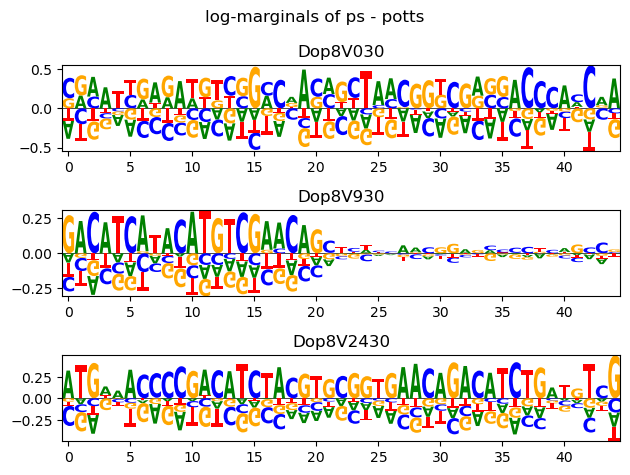

In [39]:
fig, axes = plt.subplots(len(experiment_ids))
for (i, marg) in enumerate(models_potts):
    ax = axes[i]
    logmarg = fi[i]
    logmarg = utils.zerosum_gauge_bias(logmarg)
    logomaker.Logo(pd.DataFrame(logmarg, columns=list(utils.TOKENS_DNA)), ax=ax)
    ax.set_title(experiment_ids[i])
fig.suptitle('log-marginals of ps - potts')
fig.tight_layout()